# Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc 
from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [77]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.arange(100).reshape((10,10))
b = np.arange(100).reshape((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print (a.shape)
print (b.shape)
# ========
print(a)
print(b)

(10, 10)
(10, 10)
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [79]:
def mult(a, b):
    res = np.zeros((10,10), dtype=int)
    for i in range(10):
        for j in range(10):
            for k in range(10):
                res[i][j] += a[i][k]*b[k][j]
    return res
print(mult(a, b))

[[ 2850  2895  2940  2985  3030  3075  3120  3165  3210  3255]
 [ 7350  7495  7640  7785  7930  8075  8220  8365  8510  8655]
 [11850 12095 12340 12585 12830 13075 13320 13565 13810 14055]
 [16350 16695 17040 17385 17730 18075 18420 18765 19110 19455]
 [20850 21295 21740 22185 22630 23075 23520 23965 24410 24855]
 [25350 25895 26440 26985 27530 28075 28620 29165 29710 30255]
 [29850 30495 31140 31785 32430 33075 33720 34365 35010 35655]
 [34350 35095 35840 36585 37330 38075 38820 39565 40310 41055]
 [38850 39695 40540 41385 42230 43075 43920 44765 45610 46455]
 [43350 44295 45240 46185 47130 48075 49020 49965 50910 51855]]


In [80]:
def np_mult(a, b):
    c = np.dot(a, b)
    return c
print (np_mult(a, b))

[[ 2850  2895  2940  2985  3030  3075  3120  3165  3210  3255]
 [ 7350  7495  7640  7785  7930  8075  8220  8365  8510  8655]
 [11850 12095 12340 12585 12830 13075 13320 13565 13810 14055]
 [16350 16695 17040 17385 17730 18075 18420 18765 19110 19455]
 [20850 21295 21740 22185 22630 23075 23520 23965 24410 24855]
 [25350 25895 26440 26985 27530 28075 28620 29165 29710 30255]
 [29850 30495 31140 31785 32430 33075 33720 34365 35010 35655]
 [34350 35095 35840 36585 37330 38075 38820 39565 40310 41055]
 [38850 39695 40540 41385 42230 43075 43920 44765 45610 46455]
 [43350 44295 45240 46185 47130 48075 49020 49965 50910 51855]]


In [81]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 0 ns


array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

In [82]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 0 ns


array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [102]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    pass

In [0]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    S[0] = A[0]
    for i in range(1, len(A)):
        S[i] = (S[i-1] + A[i])/i
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [143]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Z = X
    Y = X
    Y[1::2] = a
    return Z
    for i in Y:
        if i % 2 == 0:
            i = i**3
    Y = np.concatenate((X, Y))
    return Y

X = np.array([2, 3, 4, 4,4, 5, 8, 10])

print(transformation(X))

[2 1 4 1 4 1 8 1]


In [130]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X):
    
    return Y

In [0]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [98]:
a = np.random.randint(10, size =3)
b = np.random.randint(10, size=3)
print(a, b)

[7 0 9] [9 9 0]


In [99]:
def stupid_scalar_product(a,b):
    res = 0
    for i in range(len(a)):
        res += a[i]*b[i]
    return res
print(stupid_scalar_product(a, b))

63


In [100]:
def numpy_scalar_product(a,b): 
    return np.dot(a, b)

In [101]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 0 ns
Wall time: 0 ns


0

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [4]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [7]:
print(type(pic), pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

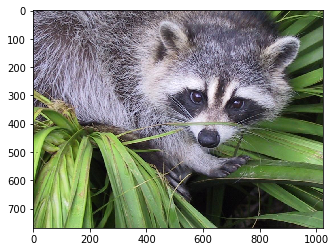

In [15]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [119]:
print(pic.size)

786432


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [39]:
print(pic.max(), pic.min(), np.mean(pic).round())

255 0 110.0


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [122]:
pic = misc.face(gray=True)

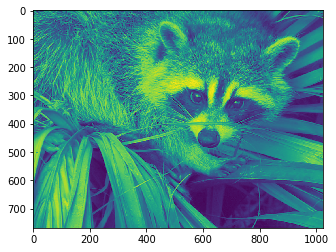

In [123]:
plt.imshow(pic)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [63]:
print(pic.shape)
h,w=768, 1024
print(pic)

(768, 1024)
[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

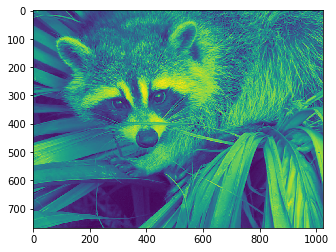

In [111]:
pic1 = []
for line in pic:
    pic1.append(line[::-1])
plt.imshow(pic1)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [114]:
pic2 = []
line2 = []
for line in pic1:
    for i in line:
        line2.append(i+50)
    pic2.append(line2)
    line2 = []

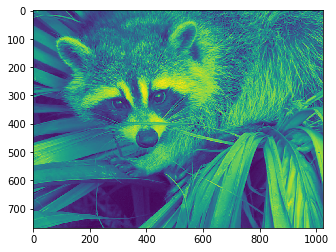

In [115]:
plt.imshow(pic2)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [141]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i][j] = np.array((int(pic2[i][j]/3), int(pic2[i][j]/3), int(pic2[i][j]/3)))

In [ ]:
plt.imshow(new_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [0]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

In [0]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [0]:
h, w, c = #тут ваш код

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

In [0]:
from copy import copy
compressed_pic = copy(china)
#тут ваш код     

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [0]:
def calculate_mismatch(a,b):
    mismatch=0
    #тут ваш код
    print(mismatch)

In [0]:
calculate_mismatch(#тут ваш код)

Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [0]:
#тут ваш код

In [0]:
plt.imshow(#тут ваш код) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [0]:
import librosa #импортируем библиотеку
import IPython.display

In [0]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [0]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [0]:
print(#тут ваш код)

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [0]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [0]:
audio = #тут ваш код

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [0]:
audio = #тут ваш код

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [153]:
#IPython.display.Audio(audio, rate=sr)
a = np.array([1, 5, 0], float)
print(np.where(a!=0,1/a,a))


[1.  0.2 0. ]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
